<a href="https://colab.research.google.com/github/wendelvilaca/python-code/blob/master/Desafio_A3data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #biblioteca utilizada para trabalhar com vetores
import pandas as pd #biblioteca para trabalhar com dataframes
import seaborn as sns #biblioteca utilizada para criar gráficos
import matplotlib.pyplot as plt #biblioteca para criar gráficos estilo Matlab
import google


**Tabela Ocorrência**



In [ ]:
df_ocorrencia = pd.read_csv('../content/ocorrencia.csv', sep=";")
df_ocorrencia.head()


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,39115,39115,39115,39115,39115,ACIDENTE,-133.805.555.556,-446.172.222.222,CORRENTINA,BA,BRASIL,SNTY,07/02/2010,17:40:00,SIM,FINALIZADA,A-031/CENIPA/2011,SIM,21/07/2011,2,1,NÃO
1,39155,39155,39155,39155,39155,INCIDENTE,***,***,BELO HORIZONTE,MG,BRASIL,****,05/02/2010,12:55:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,39156,39156,39156,39156,39156,INCIDENTE GRAVE,-152.402.777.778,-593.541.666.667,CASCAVEL,PR,BRASIL,SBCA,10/01/2010,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,30/06/2011,2,1,NÃO
3,39158,39158,39158,39158,39158,INCIDENTE,***,***,BELÉM,PA,BRASIL,****,28/01/2010,16:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
4,39176,39176,39176,39176,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,BRASIL,****,05/02/2010,09:30:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [ ]:
#analisando o dataset
df_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5242 non-null   int64 
 1   codigo_ocorrencia1              5242 non-null   int64 
 2   codigo_ocorrencia2              5242 non-null   int64 
 3   codigo_ocorrencia3              5242 non-null   int64 
 4   codigo_ocorrencia4              5242 non-null   int64 
 5   ocorrencia_classificacao        5242 non-null   object
 6   ocorrencia_latitude             3603 non-null   object
 7   ocorrencia_longitude            3602 non-null   object
 8   ocorrencia_cidade               5242 non-null   object
 9   ocorrencia_uf                   5242 non-null   object
 10  ocorrencia_pais                 5242 non-null   object
 11  ocorrencia_aerodromo            5242 non-null   object
 12  ocorrencia_dia                  5242 non-null   

In [ ]:
#verificando a existência de campos nulos
df_ocorrencia.isnull().sum()

codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude               1639
ocorrencia_longitude              1640
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      4
investigacao_aeronave_liberada     131
investigacao_status                341
divulgacao_relatorio_numero        839
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         3783
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

In [ ]:
#verificando as colunas nulas
df_ocorrencia.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,total_recomendacoes,total_aeronaves_envolvidas
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,56468.204693,56468.204693,56468.204693,56468.204693,56468.204693,0.320488,1.011637
std,13044.673295,13044.673295,13044.673295,13044.673295,13044.673295,1.186290,0.110755
min,39115.000000,39115.000000,39115.000000,39115.000000,39115.000000,0.000000,1.000000
25%,46024.500000,46024.500000,46024.500000,46024.500000,46024.500000,0.000000,1.000000
50%,51692.500000,51692.500000,51692.500000,51692.500000,51692.500000,0.000000,1.000000
75%,66449.750000,66449.750000,66449.750000,66449.750000,66449.750000,0.000000,1.000000
max,79665.000000,79665.000000,79665.000000,79665.000000,79665.000000,23.000000,3.000000


**Tabela Aeronave**

In [ ]:
df_aeronave = pd.read_csv('../content/aeronave.csv', sep=";")
df_aeronave.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0


**Tabela Fator Contribuinte**

In [ ]:
df_fator_contribuinte = pd.read_csv('../content/fator_contribuinte.csv', sep=";")
df_fator_contribuinte.head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


**Tabela Ocorrência Tipo**

In [ ]:
df_ocorrencia_tipo = pd.read_csv('../content/ocorrencia_tipo.csv', sep=";")
df_ocorrencia_tipo.head()

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP


**Tabela Recomendação**

In [ ]:
df_recomendacao = pd.read_csv('../content/recomendacao.csv', sep=";")
df_recomendacao.head()

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,39115,095/2011,21/07/2011,01/08/2011,21/12/2015,Revisar os requisitos de experiência recente p...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,39115,096/2011,21/07/2011,01/08/2011,16/09/2011,Divulgar o presente relatório final aos operad...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,39156,063/2011,30/06/2011,01/08/2011,12/09/2011,Divulgar este Relatório aos operadores de aero...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3,39156,064/2011,30/06/2011,01/08/2011,16/04/2014,Acompanhar junto à autoridade primária de cert...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,39235,205/2011,29/08/2011,29/09/2011,06/11/2012,Realizar uma vistoria de segurança de voo na A...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


**Ocorrências** - Informações sobre as ocorrências

In [ ]:

# Contando ocorrências sem repetição
df=df_ocorrencia
print("Existem no total {} ocorrências.".format(df_ocorrencia['codigo_ocorrencia'].nunique()))


Existem no total 5242 ocorrências.


In [ ]:
# Contando classificações de ocorrências

df = pd.DataFrame(df_ocorrencia['ocorrencia_classificacao'].value_counts())
df['%'] = 100*df['ocorrencia_classificacao']/df_ocorrencia['ocorrencia_classificacao'].shape[0]
df

,ocorrencia_classificacao,%
INCIDENTE,2889,55.112552
ACIDENTE,1693,32.296833
INCIDENTE GRAVE,660,12.590614


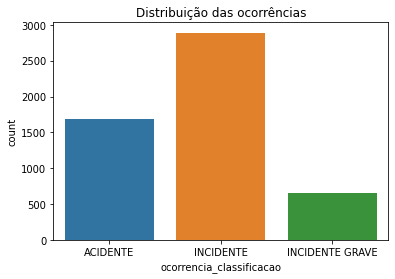

In [ ]:
#analisando a distribuição de ocorrências em cada categoria
sns.countplot(x='ocorrencia_classificacao', data=df_ocorrencia); 
plt.title('Distribuição das ocorrências');  #adiciona o título no gráfico

**Estados com mais Ocorrências**

In [ ]:
# Estados com mais Ocorrências
df = pd.DataFrame(df_ocorrencia['ocorrencia_uf'].value_counts())
df['%'] = 100*df['ocorrencia_uf']/df_ocorrencia['ocorrencia_uf'].shape[0]
df


,ocorrencia_uf,%
SP,1239,23.636017
MG,481,9.175887
RJ,480,9.156810
PR,442,8.431896
RS,334,6.371614
GO,286,5.455933
PA,262,4.998092
MT,255,4.864556
AM,215,4.101488
BA,201,3.834414


**Cidades com mais Ocorrências**

In [ ]:
# Cidades com mais Ocorrências
df = pd.DataFrame(df_ocorrencia['ocorrencia_cidade'].value_counts())
df['%'] = 100*df['ocorrencia_cidade']/df_ocorrencia['ocorrencia_cidade'].shape[0]
df

,ocorrencia_cidade,%
RIO DE JANEIRO,293,5.589470
SÃO PAULO,252,4.807325
BELO HORIZONTE,173,3.300267
GUARULHOS,139,2.651660
GOIÂNIA,132,2.518123
...,...,...
ITABERÁ,1,0.019077
VARJÃO DE MINAS,1,0.019077
PASSOS,1,0.019077
LAJEADO GRANDE,1,0.019077


**Divulgação de relatório publicado**

In [ ]:
# Divulgação de relatório publicado
df = pd.DataFrame(df_ocorrencia['divulgacao_relatorio_publicado'].value_counts())
df['%'] = 100*df['divulgacao_relatorio_publicado']/df_ocorrencia['divulgacao_relatorio_publicado'].shape[0]
df

,divulgacao_relatorio_publicado,%
NÃO,3785,72.205265
SIM,1457,27.794735


**Ocorrências por ano**

In [ ]:
#transformar datatime em ano com criaçaõd e nova coluna "Year"
df_year=df_ocorrencia
df_year['Year'] = pd.DatetimeIndex(df_year['ocorrencia_dia']).year 
df_year.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,Year
0,39115,39115,39115,39115,39115,ACIDENTE,-133.805.555.556,-446.172.222.222,CORRENTINA,BA,BRASIL,SNTY,07/02/2010,17:40:00,SIM,FINALIZADA,A-031/CENIPA/2011,SIM,21/07/2011,2,1,NÃO,2010
1,39155,39155,39155,39155,39155,INCIDENTE,***,***,BELO HORIZONTE,MG,BRASIL,****,05/02/2010,12:55:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2010
2,39156,39156,39156,39156,39156,INCIDENTE GRAVE,-152.402.777.778,-593.541.666.667,CASCAVEL,PR,BRASIL,SBCA,10/01/2010,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,30/06/2011,2,1,NÃO,2010
3,39158,39158,39158,39158,39158,INCIDENTE,***,***,BELÉM,PA,BRASIL,****,28/01/2010,16:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2010
4,39176,39176,39176,39176,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,BRASIL,****,05/02/2010,09:30:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2010


In [ ]:
# Maiores ocorrências por ano
df = pd.DataFrame(df_ocorrencia['Year'].value_counts())
df['%'] = 100*df['Year']/df_ocorrencia['Year'].shape[0]
df

,Year,%
2013,654,12.476154
2012,647,12.342617
2011,576,10.988172
2014,567,10.816482
2010,552,10.530332
2019,496,9.462037
2015,471,8.985120
2018,444,8.470050
2017,432,8.241129
2016,403,7.687905


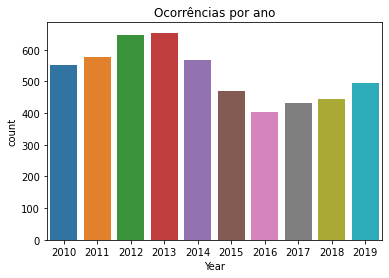

In [ ]:
#Gráfico por ano
sns.countplot(x='Year', data=df_ocorrencia); 
plt.title('Ocorrências por ano');  #adiciona o título no gráfico

**Datas com mais ocorrências**

In [ ]:
# Datas com mais ocorrências
df_ocorrencia['ocorrencia_dia'].value_counts()

18/12/2013    9
15/07/2011    8
21/04/2010    7
29/12/2011    7
09/02/2014    7
             ..
21/06/2014    1
30/09/2018    1
15/06/2018    1
22/05/2014    1
22/02/2011    1
Name: ocorrencia_dia, Length: 2701, dtype: int64

**Horários com mais ocorrências**

In [ ]:
# Horários com mais ocorrências
df = pd.DataFrame(df_ocorrencia['ocorrencia_hora'].value_counts())
df['%'] = 100*df['ocorrencia_hora']/df_ocorrencia['ocorrencia_hora'].shape[0]
df


,ocorrencia_hora,%
20:00:00,110,2.098436
19:00:00,89,1.697825
13:00:00,80,1.526135
13:30:00,80,1.526135
12:00:00,79,1.507058
...,...,...
11:16:00,1,0.019077
21:36:00,1,0.019077
01:19:00,1,0.019077
19:22:00,1,0.019077


**Tipo de ocorrências mais comuns** - Informações sobre o tipo de ocorrência.

In [ ]:
# Tipo de ocorrências mais comuns
df = pd.DataFrame(df_ocorrencia_tipo['ocorrencia_tipo'].value_counts())
df['%'] = 100*df['ocorrencia_tipo']/df_ocorrencia_tipo['ocorrencia_tipo'].shape[0]
df

,ocorrencia_tipo,%
FALHA DO MOTOR EM VOO,637,11.935544
ESTOURO DE PNEU,566,10.605209
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE,534,10.005621
PERDA DE CONTROLE NO SOLO,438,8.206858
PERDA DE CONTROLE EM VOO,336,6.295672
...,...,...
IMC NÃO INTENCIONAL,1,0.018737
CAUSADO POR RICOCHETE,1,0.018737
EXPLOSÃO,1,0.018737
HIPÓXIA,1,0.018737


In [ ]:
# Tipo de categoria mais comuns
df = pd.DataFrame(df_ocorrencia_tipo['ocorrencia_tipo_categoria'].value_counts())
df['%'] = 100*df['ocorrencia_tipo_categoria']/df_ocorrencia_tipo['ocorrencia_tipo_categoria'].shape[0]
df

,ocorrencia_tipo_categoria,%
FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO,637,11.935544
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | ESTOURO DE PNEU,566,10.605209
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE,534,10.005621
PERDA DE CONTROLE NO SOLO,438,8.206858
PERDA DE CONTROLE EM VOO,336,6.295672
...,...,...
PERDA DE SEPARAÇÃO / COLISÃO EM VOO | PERDA DE SEPARAÇÃO / COLISÃO EM VOO,1,0.018737
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | EXPLOSÃO,1,0.018737
OUTROS | HIPÓXIA,1,0.018737
RELACIONADO COM SECURITY,1,0.018737


**Aeronave** - Informações sobre as aeronaves envolvidas nas ocorrências

In [ ]:
#Ocorrências por marca de avião
df = pd.DataFrame(df_ocorrencia_aeronave['aeronave_fabricante'].value_counts())
df['%'] = 100*df['aeronave_fabricante']/df_ocorrencia_aeronave['aeronave_fabricante'].shape[0]
df

,aeronave_fabricante,%
CESSNA AIRCRAFT,816,15.387517
EMBRAER,592,11.163492
NEIVA INDUSTRIA AERONAUTICA,585,11.031492
PIPER AIRCRAFT,374,7.052612
***,286,5.393174
...,...,...
STINSON AIRCRAFT,1,0.018857
EIRIAVION,1,0.018857
SEBASTIÃO DE PAULA DO NASCIMENTO,1,0.018857
IVAN MOLCHAN,1,0.018857


In [ ]:
#Ocorrências por categoria de aeronave
df = pd.DataFrame(df_ocorrencia_aeronave['aeronave_operador_categoria'].value_counts())
df['%'] = 100*df['aeronave_operador_categoria']/df_ocorrencia_aeronave['aeronave_operador_categoria'].shape[0]
df

,aeronave_operador_categoria,%
***,1703,32.113898
PARTICULAR,980,18.480106
REGULAR,881,16.613238
TÁXI AÉREO,567,10.692061
INSTRUÇÃO,526,9.918914
EXPERIMENTAL,348,6.562323
ADMINISTRAÇÃO DIRETA,120,2.262870
AGRÍCOLA,83,1.565152
ESPECIALIZADA,62,1.169150
NÃO REGULAR,17,0.320573


In [ ]:
#Ocorrências por tipo de aeronave
df = pd.DataFrame(df_ocorrencia_aeronave['aeronave_tipo_veiculo'].value_counts())
df['%'] = 100*df['aeronave_tipo_veiculo']/df_ocorrencia_aeronave['aeronave_tipo_veiculo'].shape[0]
df

,aeronave_tipo_veiculo,%
AVIÃO,4268,80.482746
HELICÓPTERO,606,11.427494
ULTRALEVE,312,5.883462
***,81,1.527437
PLANADOR,15,0.282859
ANFÍBIO,12,0.226287
TRIKE,5,0.094286
DIRIGÍVEL,2,0.037715
HIDROAVIÃO,1,0.018857
BALÃO,1,0.018857


In [ ]:
#Ocorrências por motor de aeronave
df = pd.DataFrame(df_ocorrencia_aeronave['aeronave_motor_quantidade'].value_counts())
df['%'] = 100*df['aeronave_motor_quantidade']/df_ocorrencia_aeronave['aeronave_motor_quantidade'].shape[0]
df

,aeronave_motor_quantidade,%
MONOMOTOR,2683,50.594003
BIMOTOR,2392,45.106543
SEM TRAÇÃO,105,1.980011
TRIMOTOR,69,1.301150
***,48,0.905148
QUADRIMOTOR,6,0.113144


In [ ]:
#Ocorrências por quantidade de assentos
df = pd.DataFrame(df_ocorrencia_aeronave['aeronave_assentos'].value_counts())
df['%'] = 100*df['aeronave_assentos']/df_ocorrencia_aeronave['aeronave_assentos'].shape[0]
df

,aeronave_assentos,%
6.0,890,16.782953
2.0,811,15.293230
4.0,624,11.766924
1.0,493,9.296625
7.0,301,5.676032
...,...,...
157.0,1,0.018857
293.0,1,0.018857
312.0,1,0.018857
230.0,1,0.018857


In [ ]:
#Ocorrências por operação
df = pd.DataFrame(df_ocorrencia_aeronave['aeronave_fase_operacao'].value_counts())
df['%'] = 100*df['aeronave_fase_operacao']/df_ocorrencia_aeronave['aeronave_fase_operacao'].shape[0]
df

,aeronave_fase_operacao,%
POUSO,914,17.235527
DECOLAGEM,861,16.236093
CRUZEIRO,756,14.256081
CORRIDA APÓS POUSO,560,10.560060
TÁXI,416,7.844616
SUBIDA,342,6.449180
APROXIMAÇÃO FINAL,269,5.072600
MANOBRA,199,3.752593
ESPECIALIZADA,160,3.017160
DESCIDA,157,2.960588


In [ ]:
#Danos da aeronave por ocorrências
df = pd.DataFrame(df_ocorrencia_aeronave['aeronave_nivel_dano'].value_counts())
df['%'] = 100*df['aeronave_nivel_dano']/df_ocorrencia_aeronave['aeronave_nivel_dano'].shape[0]
df

,aeronave_nivel_dano,%
NENHUM,1856,34.999057
LEVE,1548,29.191024
SUBSTANCIAL,1524,28.738450
DESTRUÍDA,331,6.241750
***,44,0.829719


**Ocorrências com fatalidades**

In [ ]:
# Total fatalidades
df_ocorrencia_aeronave['aeronave_fatalidades_total'].sum()

826

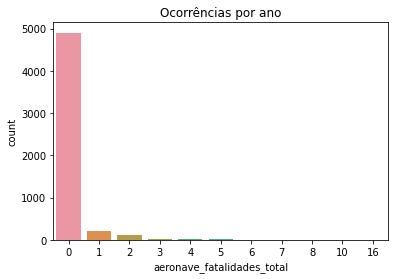

In [ ]:
sns.countplot(x='aeronave_fatalidades_total', data=df_ocorrencia_aeronave); 
plt.title('Ocorrências por ano');  #adiciona o título no gráfico

In [ ]:
df = pd.DataFrame(df_ocorrencia_aeronave['aeronave_fatalidades_total'].value_counts())
df['%'] = 100*df['aeronave_fatalidades_total']/df_ocorrencia_aeronave['aeronave_fatalidades_total'].shape[0]
df

,aeronave_fatalidades_total,%
0,4900,92.400528
1,201,3.790307
2,112,2.112012
3,30,0.565718
4,28,0.528003
5,17,0.320573
6,6,0.113144
7,4,0.075429
8,3,0.056572
10,1,0.018857


**Recomendação** - Informações sobre as recomendações de segurança geradas nas ocorrências.



In [ ]:
# Contando as recomendações sem repetição
df=df_recomendacao
print("Existem no total {} ocorrências com informações sobre as recomendações de segurança que foram geradas.".format(df_recomendacao['codigo_ocorrencia4'].nunique()))

Existem no total 677 ocorrências com informações sobre as recomendações de segurança que foram geradas.


In [ ]:
df = pd.DataFrame(df_recomendacao['recomendacao_status'].value_counts())
df['%'] = 100*df['recomendacao_status']/df_recomendacao['recomendacao_status'].shape[0]
df

,recomendacao_status,%
CUMPRIDA,1006,60.095579
AGUARDANDO RESPOSTA,370,22.102748
CUMPRIDA DE FORMA ALTERNATIVA,120,7.168459
NÃO CUMPRIDA,116,6.929510
***,62,3.703704


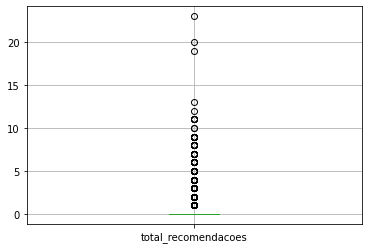

In [ ]:
#constroi o boxplot para as colunas desejadas verificando se existem outliers (anomalias) nos dados.
df_ocorrencia[['total_recomendacoes']].boxplot();

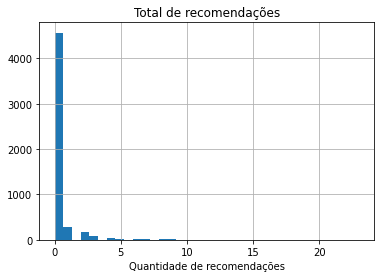

In [ ]:
#analisando a quantidade de recomendações
df_ocorrencia.hist('total_recomendacoes', bins=35);  
# adiciona o título ao gráfico (histograma)
plt.title('Total de recomendações');
plt.xlabel('Quantidade de recomendações');

**Fator Contribuinte** - Informações sobre os fatores contribuintes das ocorrências que tiveram investigações finalizadas.

In [ ]:

# Contando ocorrências sem repetição
df=df_fator_contribuinte
print("Existem no total {} ocorrências que tiveram informações sobre os fatores contribuintes.".format(df_fator_contribuinte['codigo_ocorrencia3'].nunique()))


Existem no total 944 ocorrências que tiveram informações sobre os fatores contribuintes.


In [ ]:
# Análise do fator contribuinte das ocorrências investigadas.
df = pd.DataFrame(df_fator_contribuinte['fator_nome'].value_counts())
df['%'] = 100*df['fator_nome']/df_fator_contribuinte['fator_nome'].shape[0]
df

,fator_nome,%
JULGAMENTO DE PILOTAGEM,483,12.994350
APLICAÇÃO DE COMANDOS,333,8.958838
SUPERVISÃO GERENCIAL,304,8.178639
PLANEJAMENTO DE VOO,278,7.479150
MANUTENÇÃO DE AERONAVE,225,6.053269
...,...,...
INSÔNIA,1,0.026903
ENFERMIDADE,1,0.026903
VESTIMENTA INADEQUADA,1,0.026903
INTOXICAÇÃO ALIMENTAR,1,0.026903


In [ ]:
#Análise do aspecto contribuinte das ocorrências investigadas.
df = pd.DataFrame(df_fator_contribuinte['fator_aspecto'].value_counts())
df['%'] = 100*df['fator_aspecto']/df_fator_contribuinte['fator_aspecto'].shape[0]
df

,fator_aspecto,%
DESEMPENHO DO SER HUMANO,2282,61.393597
ASPECTO PSICOLÓGICO,1079,29.028787
***,156,4.196933
ASPECTO MÉDICO,70,1.883239
INFRAESTRUTURA AEROPORTUÁRIA,62,1.668012
ERGONOMIA,37,0.995426
ASPECTO DA FABRICAÇÃO,11,0.295938
INFRAESTRUTURA DE TRÁFEGO AÉREO,9,0.242131
ASPECTO DO PROJETO,7,0.188324
ASPECTO DO MANUSEIO MATERIAL,4,0.107614


In [ ]:
#Análise do fator condicionante das ocorrências investigadas.
df = pd.DataFrame(df_fator_contribuinte['fator_condicionante'].value_counts())
df['%'] = 100*df['fator_condicionante']/df_fator_contribuinte['fator_condicionante'].shape[0]
df

,fator_condicionante,%
OPERAÇÃO DA AERONAVE,2042,54.936777
INDIVIDUAL,629,16.922249
ORGANIZACIONAL,355,9.550713
***,319,8.582190
MANUTENÇÃO DA AERONAVE,225,6.053269
PSICOSSOCIAL,132,3.551251
PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO,15,0.403551


In [ ]:
#Análise do fator da área.
df = pd.DataFrame(df_fator_contribuinte['fator_area'].value_counts())
df['%'] = 100*df['fator_area']/df_fator_contribuinte['fator_area'].shape[0]
df

,fator_area,%
FATOR OPERACIONAL,2353,63.303740
FATOR HUMANO,1186,31.907452
***,156,4.196933
FATOR MATERIAL,22,0.591875


**Previsão de fatalidade**

In [ ]:
#concatena as duas bases de dados
df_ocorrencia_aeronave=df_ocorrencia.merge(df_aeronave, on='codigo_ocorrencia2')
df_ocorrencia_aeronave.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,Year,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,39115,39115,39115,39115,ACIDENTE,-133.805.555.556,-446.172.222.222,CORRENTINA,BA,BRASIL,SNTY,07/02/2010,17:40:00,SIM,FINALIZADA,A-031/CENIPA/2011,SIM,21/07/2011,2,1,NÃO,2010,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,39155,39155,39155,39155,INCIDENTE,***,***,BELO HORIZONTE,MG,BRASIL,****,05/02/2010,12:55:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2010,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,39156,39156,39156,39156,INCIDENTE GRAVE,-152.402.777.778,-593.541.666.667,CASCAVEL,PR,BRASIL,SBCA,10/01/2010,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,30/06/2011,2,1,NÃO,2010,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,39158,39158,39158,39158,INCIDENTE,***,***,BELÉM,PA,BRASIL,****,28/01/2010,16:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2010,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,39176,39176,39176,39176,INCIDENTE,NaN,NaN,SÃO LUÍS,MA,BRASIL,****,05/02/2010,09:30:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,2010,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0


In [ ]:
#selecionando as colunas "season", "temp", "atemp", "hum", "windspeed", "cnt"
df_previsao_fatalidade=df_ocorrencia_aeronave[["codigo_ocorrencia","ocorrencia_classificacao","ocorrencia_cidade","ocorrencia_uf","ocorrencia_hora",
                                      "aeronave_tipo_veiculo","aeronave_motor_tipo","aeronave_motor_quantidade","aeronave_fatalidades_total"]]

df_previsao_fatalidade.to_csv('previsao_fatalidade.csv', index=False, sep=';',encoding='cp1252')

df_previsao_fatalidade.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_hora,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_fatalidades_total
0,39115,ACIDENTE,CORRENTINA,BA,17:40:00,AVIÃO,PISTÃO,MONOMOTOR,0
1,39155,INCIDENTE,BELO HORIZONTE,MG,12:55:00,AVIÃO,TURBOÉLICE,BIMOTOR,0
2,39156,INCIDENTE GRAVE,CASCAVEL,PR,23:15:00,AVIÃO,TURBOÉLICE,BIMOTOR,0
3,39158,INCIDENTE,BELÉM,PA,16:00:00,AVIÃO,JATO,BIMOTOR,0
4,39176,INCIDENTE,SÃO LUÍS,MA,09:30:00,AVIÃO,JATO,BIMOTOR,0
